# Chain (directional trend) # 
Every pair of consecutive subsequences in a chain must be connected by both a forward arrow and a backward arrow. The key component of drifting is that the time series must contain chains with clear directionality

Stumpy Tutorial Time Series Chains:
https://stumpy.readthedocs.io/en/latest/Tutorial_Time_Series_Chains.html

Matrix Profile VII: Time Series Chains:
https://sites.google.com/site/timeserieschain/

Robust Time Series Chain Discovery with Incremental Nearest Neighbors:
https://sites.google.com/view/robust-time-series-chain-22 

In [1]:
# SETUP
import stumpy
import helper.testdata as testdata
import helper.visualize as visualize
import helper.results as results
import helper.utils as utils

## Penguin ##
Telemetry collected from a Magellanic penguin. The full data consists of 1,048,575 data points recorded at 40 Hz (about 7.2 hours). We focus on the X-Axis acceleration (the direction of travel for a swimming bird). 

Chain found with m = 28 (~0.7 s)

No "Ground Truth", this dataset was used exploratory

In [2]:
# SETUP
use_case = "chains"
data_name = "penguinshort"
T = testdata.load_from_mat("../data/" + use_case + "/" + data_name + ".mat", "penguinshort")

### Experiments ###

In [3]:
# Hyperparams
target_w = 25
ds = utils.calculate_ds(target_w)
print(ds)

[1, 2, 3, 4, 5]


In [4]:
# calculate
for d in ds:
    m = round((target_w-1)/d) + 1
    file_name =  data_name + "_d" + str(d) + "_m" + str(m)
    file_path = "../results/" + use_case + "/" + data_name + "/" + file_name

    if d == 1:
        mp = stumpy.stump(T, m=m)
    else:
        mp = stumpy.stump_dil(T, m=m, d=d)
    all_chain_set, unanchored_chain = stumpy.allc(mp[:, 2], mp[:, 3])
    all_non_overlapping_chain_set, non_overlapping_unanchored_chain = utils.remove_overlapping_chains(all_chain_set, m, d)

    max_distance_in_unanchored_chain = unanchored_chain[-1] - unanchored_chain[0]
    max_distance_in_non_overlapping_unanchored_chain = non_overlapping_unanchored_chain[-1] - non_overlapping_unanchored_chain[0]
    
    results.save([T, m, d, mp, all_chain_set, all_non_overlapping_chain_set, unanchored_chain, non_overlapping_unanchored_chain, max_distance_in_unanchored_chain, max_distance_in_non_overlapping_unanchored_chain], file_path + ".npy")

/vol/fob-vol3/mi20/hirschmi/mp_dilation_master/experiments_master_mp_dilation/usecases/helper/results.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.array(np_arrays)
/vol/fob-vol3/mi20/hirschmi/mp_dilation_master/stumpy_master_mp_dilation/stumpy/core.py:67: UserWarning: Excluding `['normalize', 'p']` parameters, function `stump_dil(['T_A', 'm', 'T_B', 'ignore_trivial', 'k', 'd']) and function `aamp(['T_A', 'm', 'T_B', 'ignore_trivial', 'k']) have different arguments/parameters.
  warnings.warn(msg)


 File:  ../results/chains/penguinshort/penguinshort_d1_m25.npy  already exists, but will be overwritten. 


/vol/fob-vol3/mi20/hirschmi/mp_dilation_master/experiments_master_mp_dilation/usecases/helper/results.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.array(np_arrays)
/vol/fob-vol3/mi20/hirschmi/mp_dilation_master/stumpy_master_mp_dilation/stumpy/core.py:67: UserWarning: Excluding `['normalize', 'p']` parameters, function `stump_dil(['T_A', 'm', 'T_B', 'ignore_trivial', 'k', 'd']) and function `aamp(['T_A', 'm', 'T_B', 'ignore_trivial', 'k']) have different arguments/parameters.
  warnings.warn(msg)


 File:  ../results/chains/penguinshort/penguinshort_d2_m13.npy  already exists, but will be overwritten. 
 File:  ../results/chains/penguinshort/penguinshort_d3_m9.npy  already exists, but will be overwritten. 
 File:  ../results/chains/penguinshort/penguinshort_d4_m7.npy  already exists, but will be overwritten. 
 File:  ../results/chains/penguinshort/penguinshort_d5_m6.npy  already exists, but will be overwritten. 


/vol/fob-vol3/mi20/hirschmi/mp_dilation_master/experiments_master_mp_dilation/usecases/helper/visualize.py:65: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8,4))


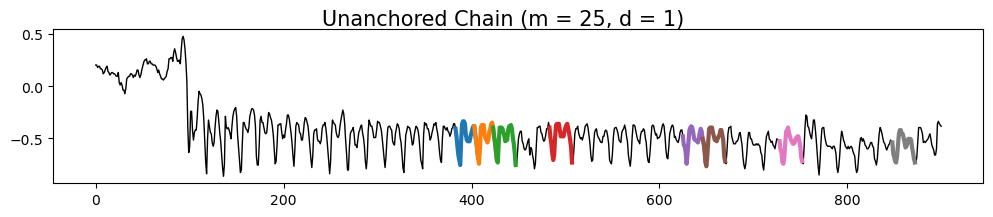

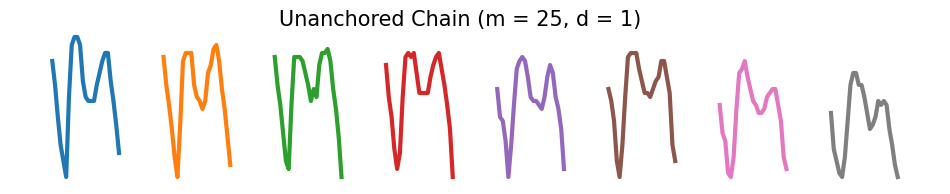

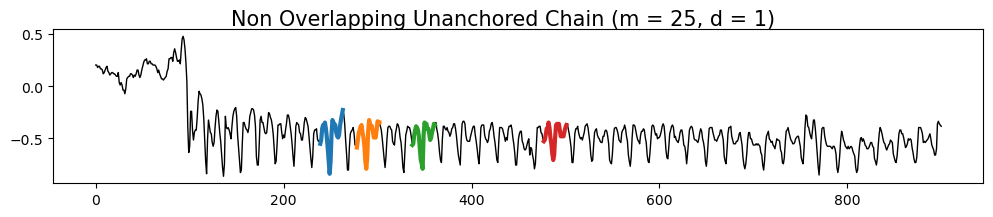

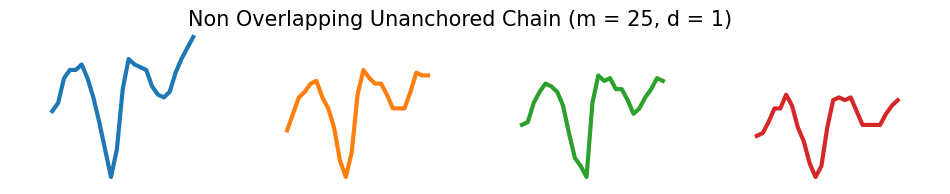

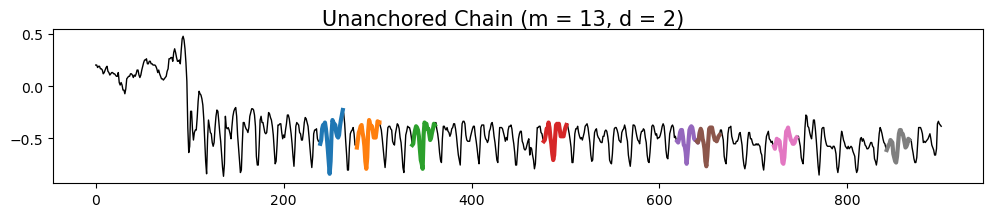

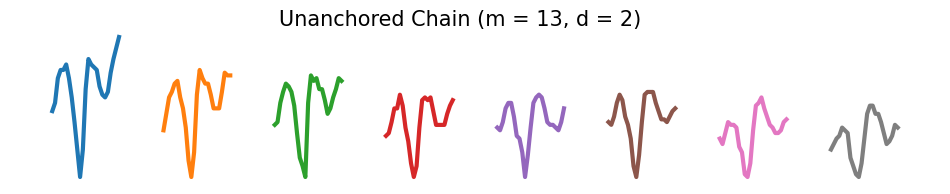

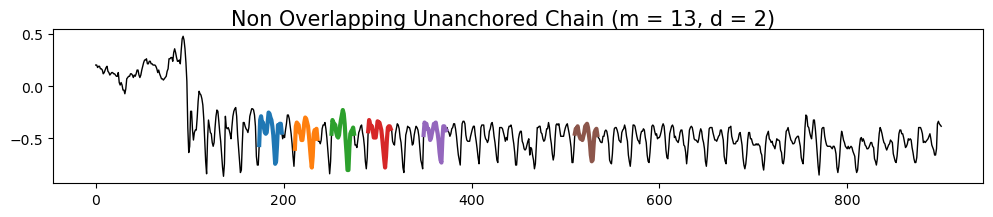

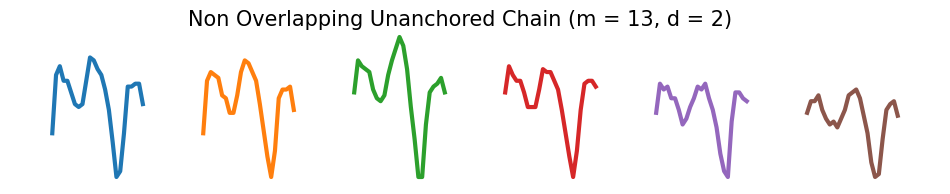

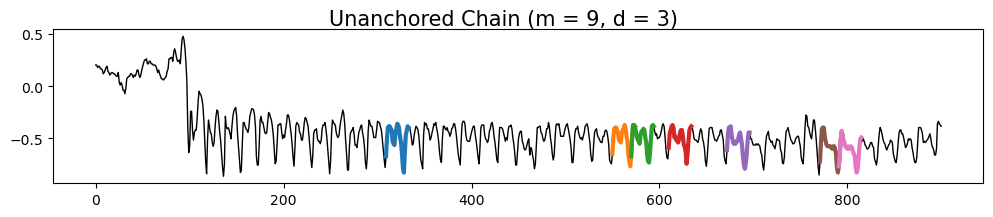

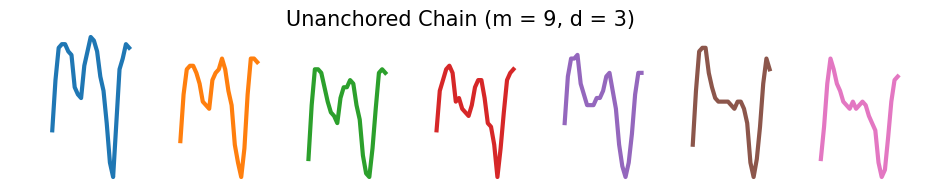

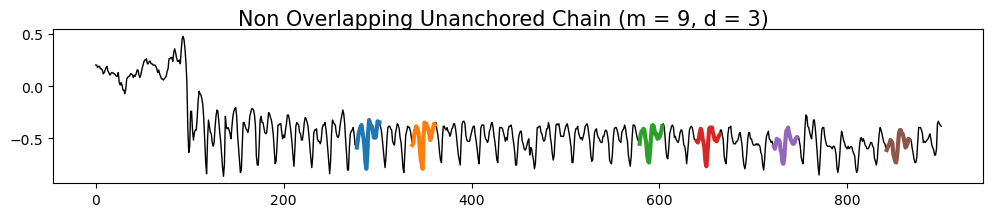

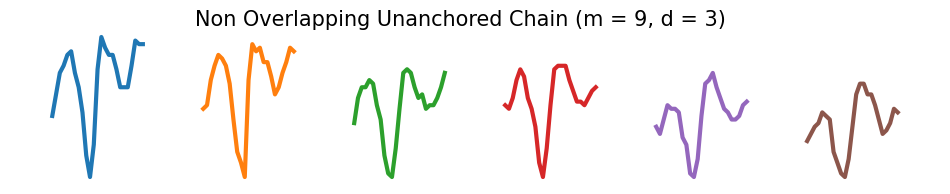

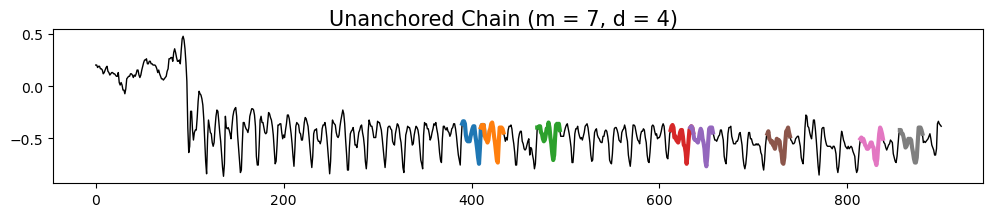

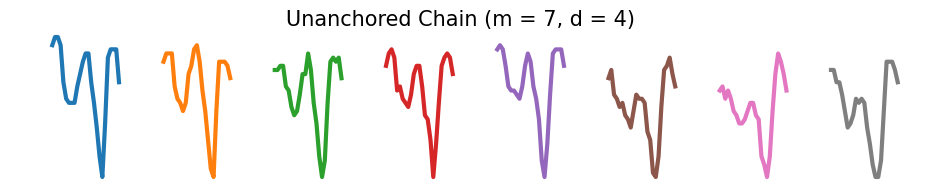

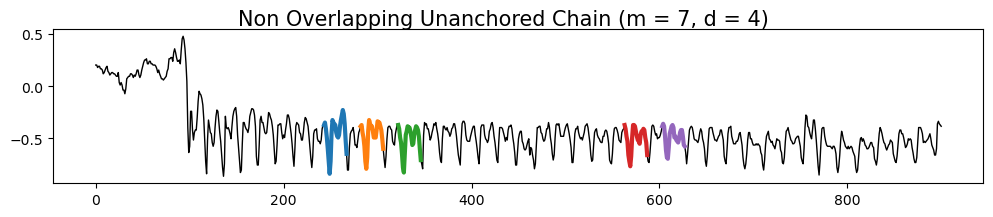

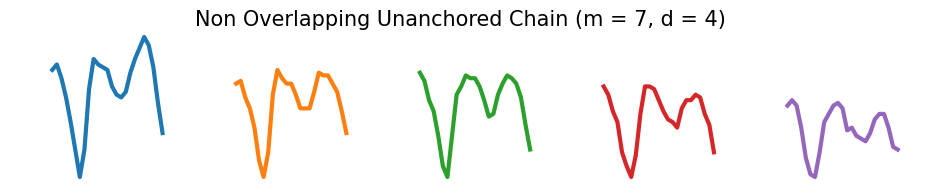

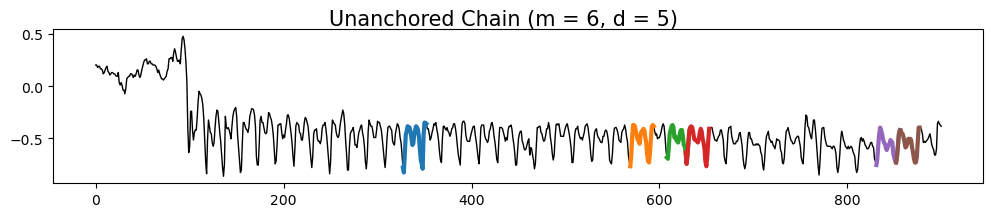

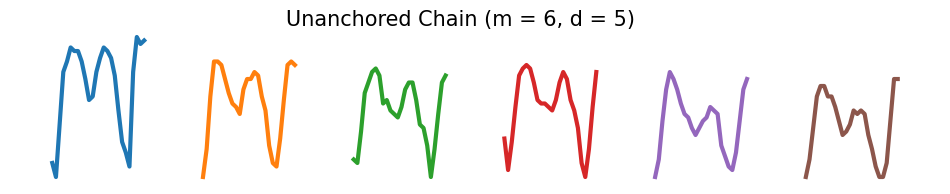

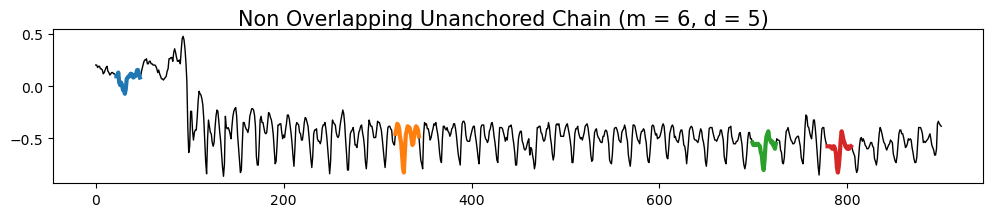

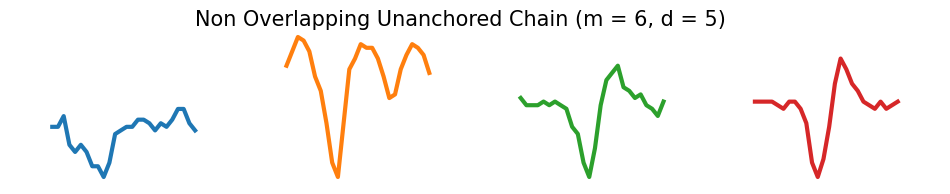

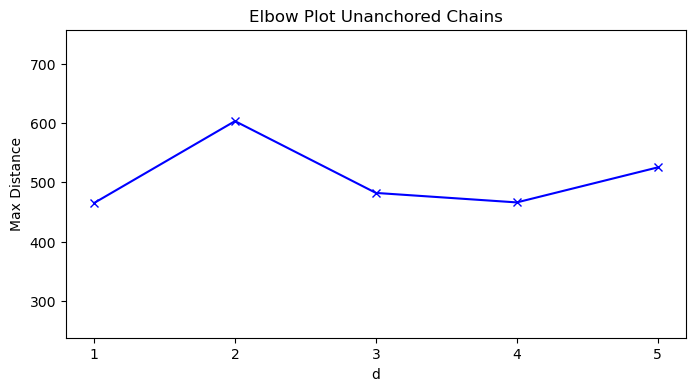

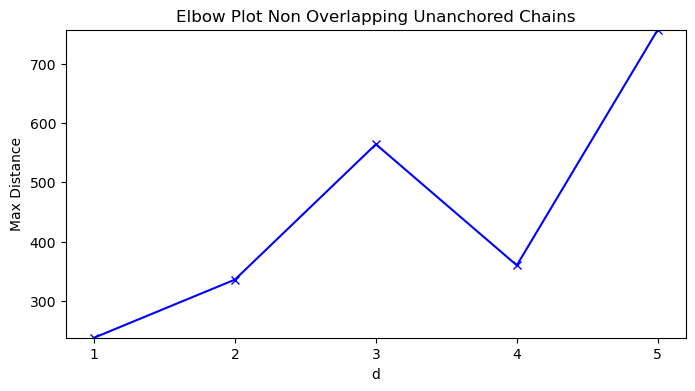

In [5]:
# visualize:
max_distances_unanchored_chains = []
max_distances_non_overlapping_unanchored_chains = []
for d in ds:
    m = round((target_w-1)/d) + 1
    file_name = data_name + "_d" + str(d) + "_m" + str(m)
    file_path = "../results/" + use_case + "/" + data_name + "/" + file_name

    T, m, d, mp, all_chain_set, all_non_overlapping_chain_set, unanchored_chain, non_overlapping_unanchored_chain, max_distance_in_unanchored_chain, max_distance_in_non_overlapping_unanchored_chain = results.load(file_path + ".npy")

    max_distances_unanchored_chains.append(max_distance_in_unanchored_chain)
    max_distances_non_overlapping_unanchored_chains.append(max_distance_in_non_overlapping_unanchored_chain)
    
    # unanchored chain
    plot = visualize.chain_unanchored(T, unanchored_chain, m, d, "Unanchored Chain")
    plot.savefig(file_path + "_unanchored")
    plot = visualize.chain_unanchored_snippets(T, unanchored_chain, m, d, "Unanchored Chain")
    plot.savefig(file_path + "_unanchored_snippets")

    # non overlapping unanchored chain
    plot = visualize.chain_unanchored(T, non_overlapping_unanchored_chain, m, d, "Non Overlapping Unanchored Chain")
    plot.savefig(file_path + "unanchored_non_overlapping")
    plot = visualize.chain_unanchored_snippets(T, non_overlapping_unanchored_chain, m, d, "Non Overlapping Unanchored Chain")
    plot.savefig(file_path + "unanchored_snippets_non_overlapping")

# elbow plot for ds
y_lim = utils.get_min_max_from_lists(max_distances_unanchored_chains, max_distances_non_overlapping_unanchored_chains)
plot = visualize.chain_elbowplot(max_distances_unanchored_chains, ds, y_lim, "Elbow Plot Unanchored Chains")
plot.savefig("../results/" + use_case + "/" + data_name + "/" + data_name + "_elbowplot")
plot = visualize.chain_elbowplot(max_distances_non_overlapping_unanchored_chains, ds, y_lim, "Elbow Plot Non Overlapping Unanchored Chains")
plot.savefig("../results/" + use_case + "/" + data_name + "/" + data_name + "_elbowplot_non_overlapping")